In [17]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import webbrowser


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#import the data from a csv-file
df_yr_built = pd.read_csv('data/eda.yr_built.csv')

In [4]:
df_yr_built.duplicated().value_counts()

False    4973
Name: count, dtype: int64

In [82]:
df_yr_built.shape

(4973, 23)

In [83]:
filtered_df = df_yr_built.query("yr_built == 1974 and sqft_living == 2160")
filtered_df

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
4145,687600010,4.000,1.750,2160.000,39430.000,1.000,0.000,0.000,4,8,...,0.000,98005,47.638,-122.185,2430.000,35329.000,2014-08-05,753000.000,687600010,16287


Most atractive houses to be renovated based on Houzz Research agency \
https://www.houzz.com/magazine/2022-renovations-by-home-age-stsetivw-vs~163160454 \
Are those that were built in between 1974-1993 (22-35 yo)

based on client's requeirments I fillter: 
* Condition relevant to renovating
* High grade 

In [84]:
df_condition_3 = df_yr_built.query('condition <=4 & grade > 7 & grade < 9')
df_condition_3.shape


(1614, 23)

Text(0.5, 1.0, 'Number of houses with condition less or equal than 4 and grade between 7 and 9')

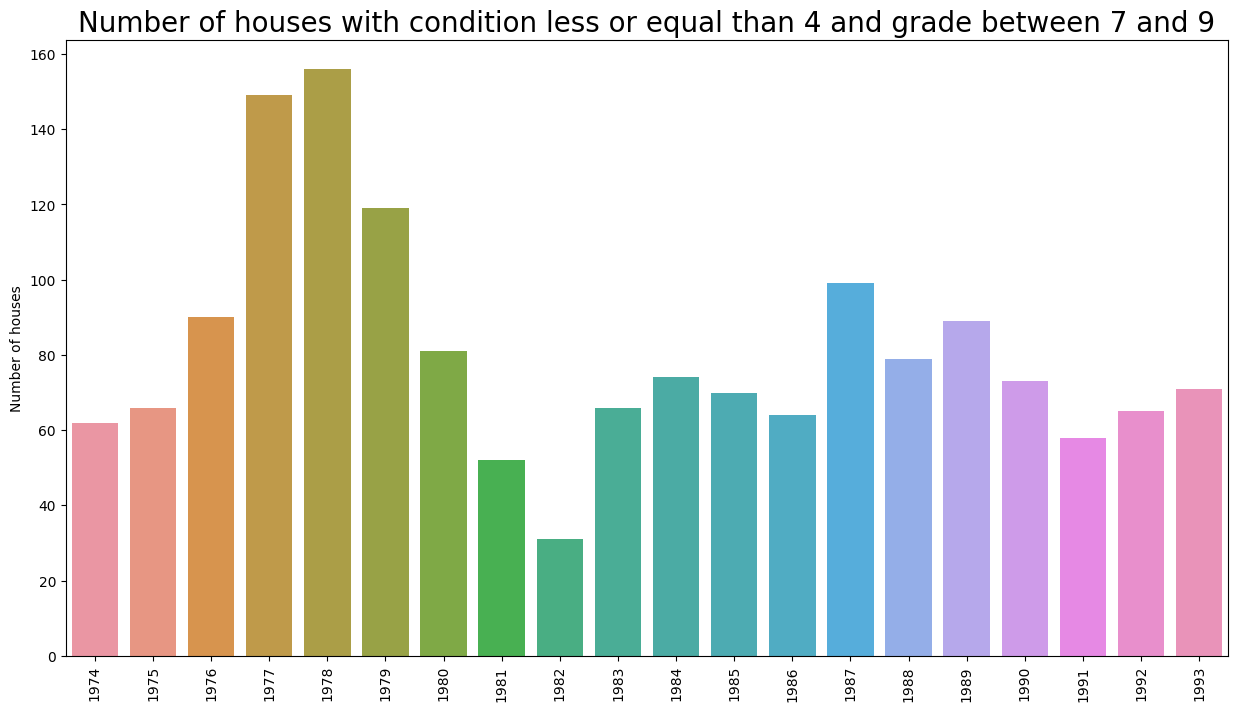

In [97]:
# Plot number of houses per year
plt.figure(figsize=(15,8))
f1 = sns.countplot(x=df_condition_3['yr_built'])
f1.tick_params(axis='x', rotation=90)
f1.set(xlabel=None)
f1.set_ylabel("Number of houses", fontsize = 10)
f1.set_title('Number of houses with condition less or equal than 4 and grade between 7 and 9', fontsize=20)

Based on research, that shows the most atractive districst I'll pick 4 (indexes)  

In [95]:
zipcodes_to_query = [98004,98005,98052,98033]
df_zipcode = df_condition_3[df_condition_3['zipcode'].isin(zipcodes_to_query)]
df_zipcode.shape

(216, 23)

In [87]:
filtered_df = df_zipcode.query("yr_built == 1974 and sqft_living == 2160")
filtered_df


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
4145,687600010,4.000,1.750,2160.000,39430.000,1.000,0.000,0.000,4,8,...,0.000,98005,47.638,-122.185,2430.000,35329.000,2014-08-05,753000.000,687600010,16287


### Create a map centered around King County based on choosen zipcodes

In [96]:
# Create a map centered around King County
m = folium.Map(location=[47.6062, -122.3321], zoom_start=10)
# Iterate through the DataFrame and add markers for each house
for index, row in df_zipcode.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"House ID: {row['id']}<br>Price: ${row['price']:.2f}<br>House Grading: {row['grade']}",
        icon=folium.Icon(color='red')
    ).add_to(m)
# Display the map/ save it as html.
m.save('king_county_houses_map_zipcode.html')

webbrowser.open('file:///Users/mac/Spiced/Projects/eda-houses-sales/king_county_houses_map_zipcode.html', new=2)


True

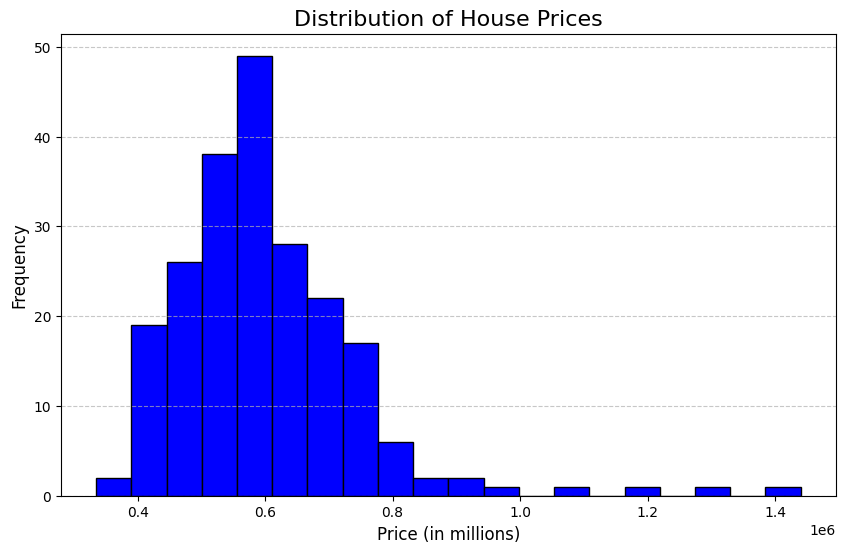

In [90]:
plt.figure(figsize=(10, 6))

# Plot histogram
ax = df_zipcode['price'].plot(kind='hist', bins=20, edgecolor='black', color='blue')

# Set title and labels
plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Price (in millions)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

### Price range 
mean, median

In [69]:
mean_price = df_date['price'].mean()
median_price = df_date['price'].median()
min_price = df_date['price'].min()
max_price = df_date['price'].max()

print(f"Mean Price: ${mean_price:.2f}")
print(f"Median Price: ${median_price:.2f}")
print(f"Minimum Price: ${min_price:.2f}")
print(f"Maximum Price: ${max_price:.2f}")

Mean Price: $577945.43
Median Price: $562000.00
Minimum Price: $335000.00
Maximum Price: $1070000.00


### TimeSeries house sales

In [111]:
df_date = df_yr_built.copy()

In [112]:
df_date['date'] = pd.to_datetime(df_date['date'])
df_date.set_index('date', inplace=True)


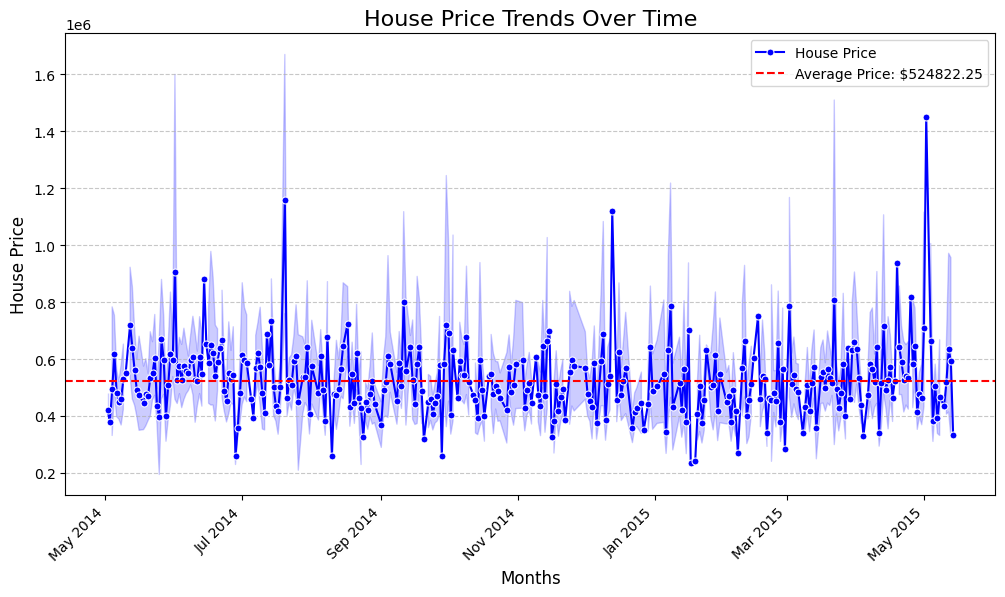

In [114]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_date, x=df_date.index, y='price', color='blue', marker='o', markersize=5, label='House Price')

# Add title and labels
plt.title('House Price Trends Over Time', fontsize=16)
plt.xlabel('Months', fontsize=12)
plt.ylabel('House Price', fontsize=12)

# Improve x-axis date formatting
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show legend
plt.legend()

# Add a horizontal line for the average price
average_price = df_date['price'].mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average Price: ${average_price:.2f}')
plt.legend()


### House price distribution in selected zipcodes

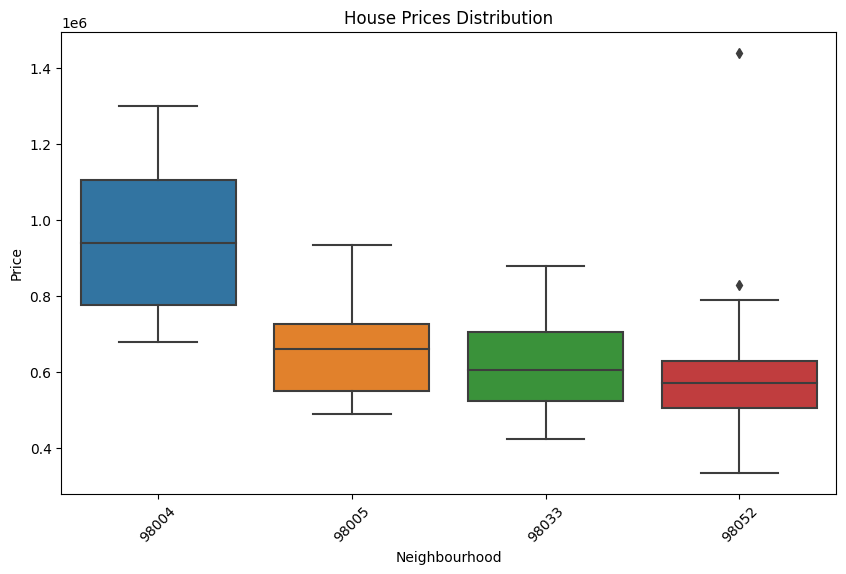

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='zipcode', y='price', data=df_zipcode)
plt.title('House Prices Distribution')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

### House size & Price
Scatterplot

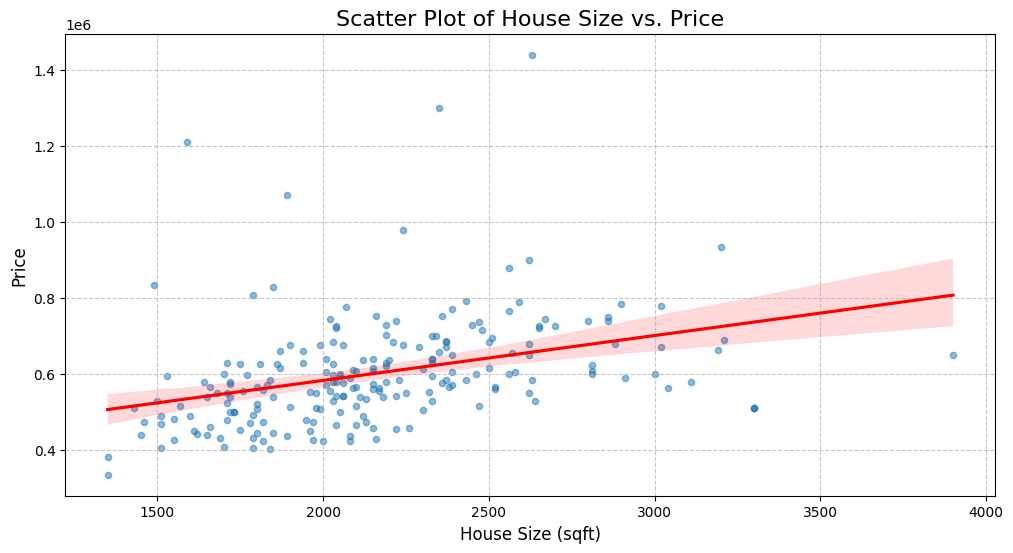

In [88]:
plt.figure(figsize=(12, 6))
sns.regplot(x='sqft_living', y='price', data=df_zipcode, scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot of House Size vs. Price', fontsize=16)
plt.xlabel('House Size (sqft)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)


Filtered based on observations

In [100]:
df_sqft_living = df_zipcode.query('price < 450000 & sqft_living > 2000')
df_living_sample = df_sqft_living[["bathrooms","bedrooms","sqft_living","sqft_lot","sqft_lot","floors","zipcode","price","yr_built","condition","grade"]]
df_living_sample

,bathrooms,bedrooms,sqft_living,sqft_lot,sqft_lot,floors,zipcode,price,yr_built,condition,grade
601,1.750,4.000,2160.000,7700.000,7700.000,2.000,98033,429000.000,1977,2,8
1302,2.000,3.000,2080.000,12094.000,12094.000,2.000,98052,424240.000,1982,4,8
3678,1.750,3.000,2080.000,12714.000,12714.000,2.000,98052,436800.000,1984,4,8


Mapped filtered house living size

In [101]:
# Create a map centered around King County
m = folium.Map(location=[47.6062, -122.3321], zoom_start=10)
# Iterate through the DataFrame and add markers for each house
for index, row in df_sqft_living.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"House ID: {row['id']}<br>Price: ${row['price']:.2f}<br>House Grading: {row['grade']}",
        icon=folium.Icon(color='red')
    ).add_to(m)
# Display the map/ save it as html.
m.save('king_county_houses_map_df_sqft_living.html')

webbrowser.open('file:///Users/mac/Spiced/Projects/eda-houses-sales/king_county_houses_map_df_sqft_living.html', new=2)


True

### Lot's size & price
Scatterplot

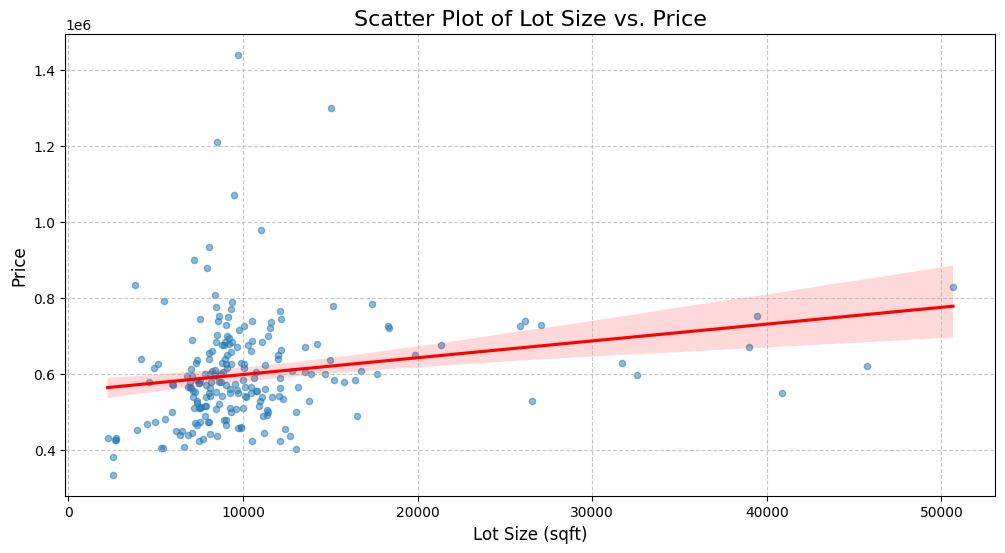

In [102]:
plt.figure(figsize=(12, 6))
sns.regplot(x='sqft_lot', y='price', data=df_zipcode, scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot of Lot Size vs. Price', fontsize=16)
plt.xlabel('Lot Size (sqft)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)


Filtered based on observations

In [109]:
df_sqft_lot = df_zipcode.query('sqft_lot > 22000 & sqft_lot & zipcode == 98005')
df_lot_sample = df_sqft_lot[["sqft_living","sqft_lot","sqft_lot15","floors","zipcode","price","yr_built","condition","grade"]]
df_lot_sample

,sqft_living,sqft_lot,sqft_lot15,floors,zipcode,price,yr_built,condition,grade
2184,2330.000,26571.000,20037.000,2.500,98005,530000.000,1987,3,8
3427,2860.000,26136.000,25040.000,1.000,98005,740000.000,1977,3,8
4145,2160.000,39430.000,35329.000,1.000,98005,753000.000,1974,4,8


In [110]:
# Create a map centered around King County
m = folium.Map(location=[47.6062, -122.3321], zoom_start=10)
# Iterate through the DataFrame and add markers for each house
for index, row in df_sqft_lot.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"House ID: {row['id']}<br>Price: ${row['price']:.2f}<br>House Grading: {row['grade']}",
        icon=folium.Icon(color='red')
    ).add_to(m)
# Display the map/ save it as html.
m.save('king_county_houses_map_df_sqft_lot.html')

webbrowser.open('file:///Users/mac/Spiced/Projects/eda-houses-sales/king_county_houses_map_df_sqft_lot.html', new=2)


True